In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import subprocess

In [3]:
output = subprocess.check_output("grep \'^ 200\' training_logs", shell=True).decode("utf-8") 

In [4]:
output_log = np.array([[float(i) for i in o.split()] for o in output.split('\n')[:-1]])

In [5]:
output_gt16 = subprocess.check_output("grep \'^ 200\' training_logs_gt16", shell=True).decode("utf-8")
output_gt16_log = np.array([[float(i) for i in o.split()] for o in output_gt16.split('\n')[:-1]])

Text(0, 0.5, 'Loss')

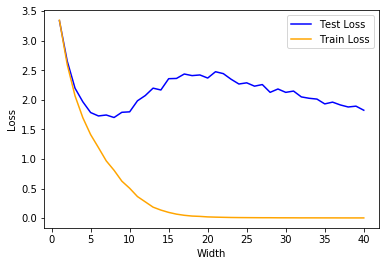

In [12]:
plt.plot(range(1, 41), np.concatenate((output_log[:,4], output_gt16_log[:,4])), 
         label = 'Test Loss', color = 'blue')
plt.plot(range(1, 41), np.concatenate((output_log[:,2], output_gt16_log[:,2])), 
         label = 'Train Loss', color = 'orange')

# plt.plot(range(16,41), output_gt16_log[:,4], color = 'blue')
# plt.plot(range(16,41), output_gt16_log[:,2], color = 'orange')

plt.legend()
plt.xlabel('Width')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

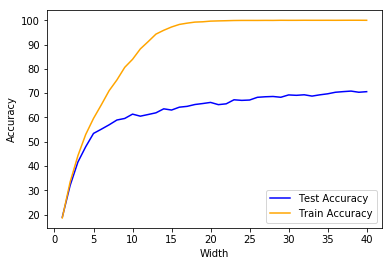

In [13]:
plt.plot(range(1, 41), np.concatenate((output_log[:,5], output_gt16_log[:,5])), 
         label = 'Test Accuracy', color = 'blue')
plt.plot(range(1, 41), np.concatenate((output_log[:,3], output_gt16_log[:,3])), 
         label = 'Train Accuracy', color = 'orange')

# plt.plot(range(16,41), output_gt16_log[:,4], color = 'blue')
# plt.plot(range(16,41), output_gt16_log[:,2], color = 'orange')

plt.legend()
plt.xlabel('Width')
plt.ylabel('Accuracy')